In [1]:

# Auto-reload external modules when their source changes
%load_ext autoreload
%autoreload 2

import sys
from pathlib import Path
import src.train as train
import src.models as models
import utils.helpers as helpers
import pandas as pd
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt



# Path variables
BASE_PATH = "src/inputs/"
TRAIN_PATH = BASE_PATH + "train.csv"
TEST_PATH = BASE_PATH + "test.csv"
train_jpg = glob(BASE_PATH + "train/*.jpg")
test_jpg = glob(BASE_PATH + "test/*.jpg")



In [2]:
# to set the seeds for reproducibility
helpers.set_seeds()

Loading train and test csv files

In [3]:
train_df = pd.read_csv(BASE_PATH + "train.csv")
test_df =  pd.read_csv(BASE_PATH + "test.csv")


In [4]:
print("train shape:",train_df.shape)
print("test shape",test_df.shape)


train shape: (9912, 14)
test shape (8, 13)


In [5]:
train_df.head()

Id  Subject Focus  Eyes  Face  Near  Action  \
0  0007de18844b0dbbb5e1f607da0606e0              0     1     1     1       0   
1  0009c66b9439883ba2750fb825e1d7db              0     1     1     0       0   
2  0013fd999caf9a3efe1352ca1b0d937e              0     1     1     1       0   
3  0018df346ac9c1d8413cfcc888ca8246              0     1     1     1       0   
4  001dc955e10590d3ca4673f034feeef2              0     0     0     1       0   

   Accessory  Group  Collage  Human  Occlusion  Info  Blur  Pawpularity  
0          0      1        0      0          0     0     0           63  
1          0      0        0      0          0     0     0           42  
2          0      0        0      1          1     0     0           28  
3          0      0        0      0          0     0     0           15  
4          0      1        0      0          0     0     0           72

In [6]:
test_df.head()

Id  Subject Focus  Eyes  Face  Near  Action  \
0  4128bae22183829d2b5fea10effdb0c3              1     0     1     0       0   
1  43a2262d7738e3d420d453815151079e              0     1     0     0       0   
2  4e429cead1848a298432a0acad014c9d              0     0     0     1       0   
3  80bc3ccafcc51b66303c2c263aa38486              1     0     1     0       0   
4  8f49844c382931444e68dffbe20228f4              1     1     1     0       1   

   Accessory  Group  Collage  Human  Occlusion  Info  Blur  
0          1      1        0      0          1     0     1  
1          0      1        1      0          0     0     0  
2          1      1        1      0          1     1     1  
3          0      0        0      0          0     1     0  
4          1      0        1      0          1     1     0

The train.csv and test.csv files contain metadata for photos in the training set and test set, respectively. Each pet photo is labeled with the value of 1 (Yes) or 0 (No) for each of the following features:

Focus - Pet stands out against uncluttered background, not too close / far.  
Eyes - Both eyes are facing front or near-front, with at least 1 eye / pupil decently clear.  
Face - Decently clear face, facing front or near-front.  
Near - Single pet taking up significant portion of photo (roughly over 50% of photo width or height).  
Action - Pet in the middle of an action (e.g., jumping).  
Accessory - Accompanying physical or digital accessory / prop (i.e. toy, digital sticker), excluding collar and leash.  
Group - More than 1 pet in the photo.  
Collage - Digitally-retouched photo (i.e. with digital photo frame, combination of multiple photos).  
Human - Human in the photo.  
Occlusion - Specific undesirable objects blocking part of the pet (i.e. human, cage or fence). Note that not all blocking objects are considered occlusion.  
Info - Custom-added text or labels (i.e. pet name, description).  
Blur - Noticeably out of focus or noisy, especially for the pet’s eyes and face. For Blur entries, “Eyes” column is always set to 0.  

In [7]:
print("Null Values: ",train_df.isnull().sum())
print("Duplicate Values: ",train_df.duplicated().sum())

Null Values:  Id               0
Subject Focus    0
Eyes             0
Face             0
Near             0
Action           0
Accessory        0
Group            0
Collage          0
Human            0
Occlusion        0
Info             0
Blur             0
Pawpularity      0
dtype: int64
Duplicate Values:  0


In [8]:
print("Null Values: ",test_df.isnull().sum())
print("Duplicate Values: ",test_df.duplicated().sum())

Null Values:  Id               0
Subject Focus    0
Eyes             0
Face             0
Near             0
Action           0
Accessory        0
Group            0
Collage          0
Human            0
Occlusion        0
Info             0
Blur             0
dtype: int64
Duplicate Values:  0


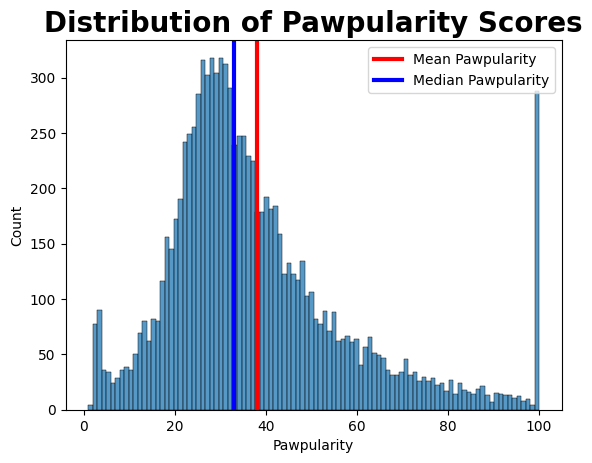

The mean Pawpularity score is 38.03904358353511
The median Pawpularity score is 33.0
The standard deviation of the Pawpularity score is 20.59199010577444
There are 100 unique values of Pawpularity score


In [9]:
#To check the distribution of Pawpularity Scores

helpers.plotDistribution(train_df)

print(f"The mean Pawpularity score is {train_df['Pawpularity'].mean()}")
print(f"The median Pawpularity score is {train_df['Pawpularity'].median()}")
print(f"The standard deviation of the Pawpularity score is {train_df['Pawpularity'].std()}")
print(f"There are {len(train_df['Pawpularity'].unique())} unique values of Pawpularity score")


> From the distribution graph above, we can see that pets with Pawpularity score 20 to 40 are more, Also there is a high peak at 100 score, but before that most of the pets have the score from around ~60 - ~90 .  

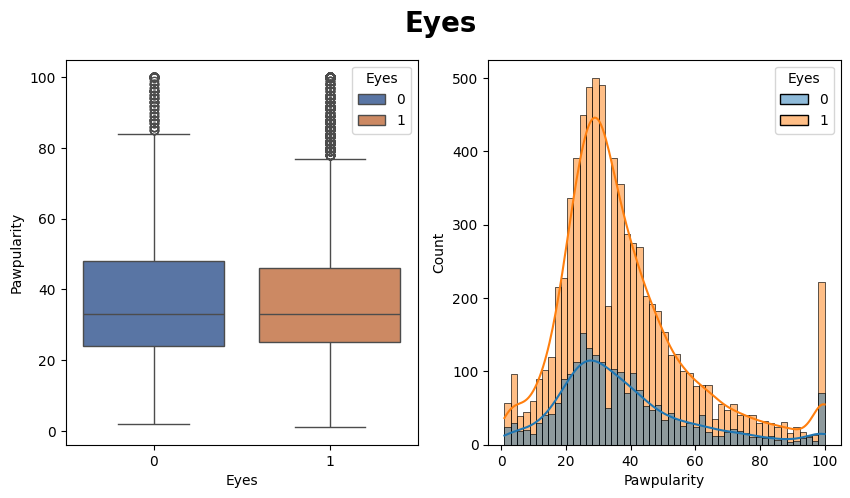

In [10]:
#showing one feature with the Pawpularity
helpers.plotDistributionAcrossEachFeature(["Eyes"],train_df)

> For the single feature like "Eye", both categories "0", "1" are similar as shown in the box plot, However we can see that those with high pawpularity are mostly the pets facing front or near-front, with at least 1 eye / pupil decently clear. 

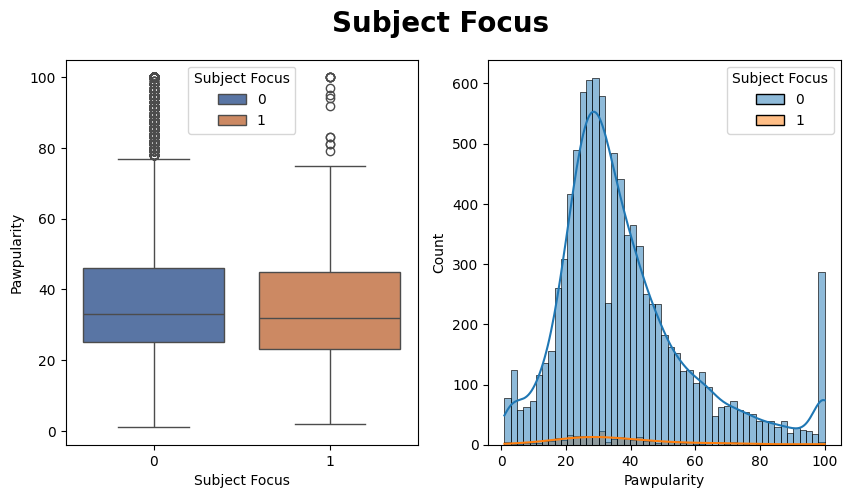

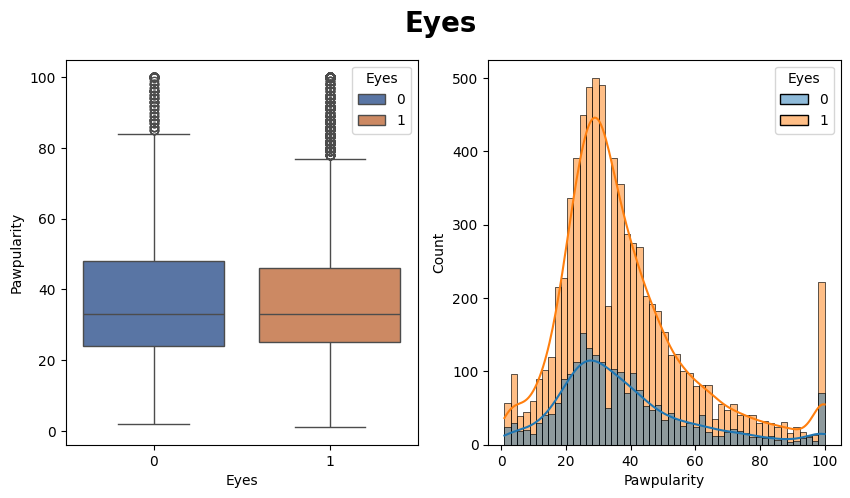

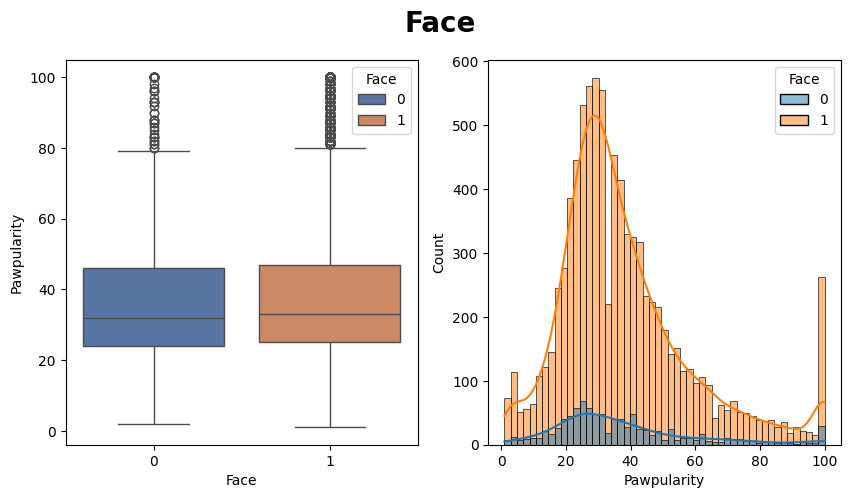

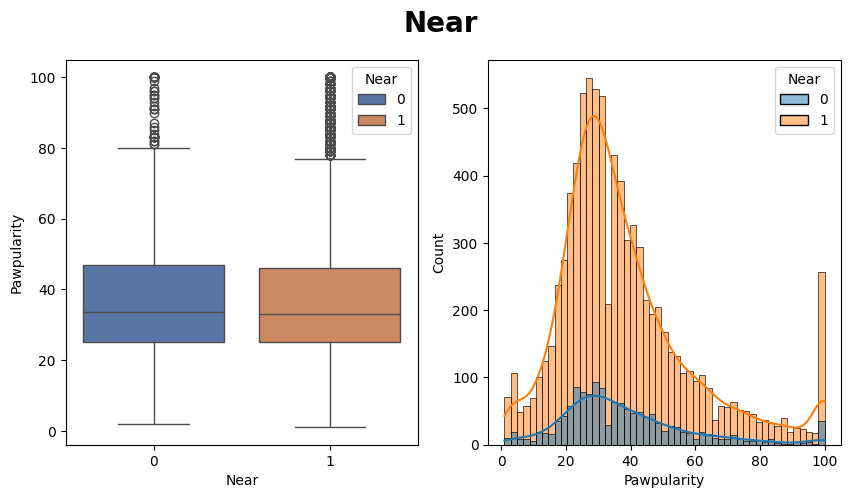

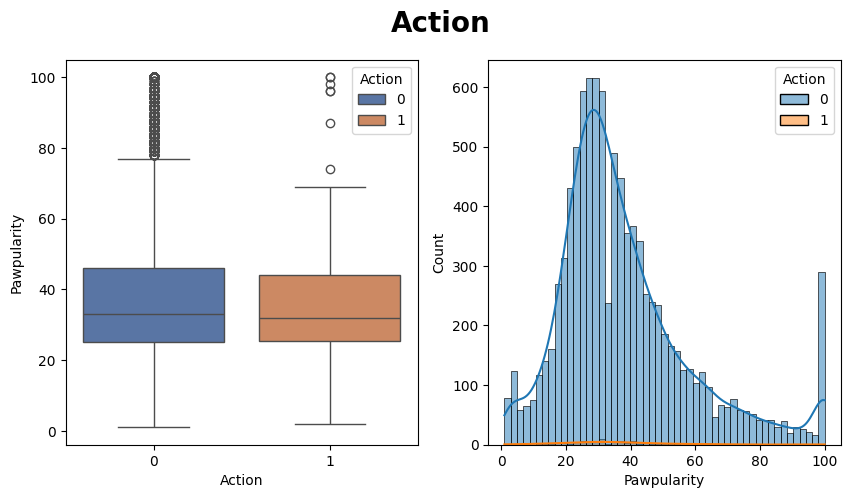

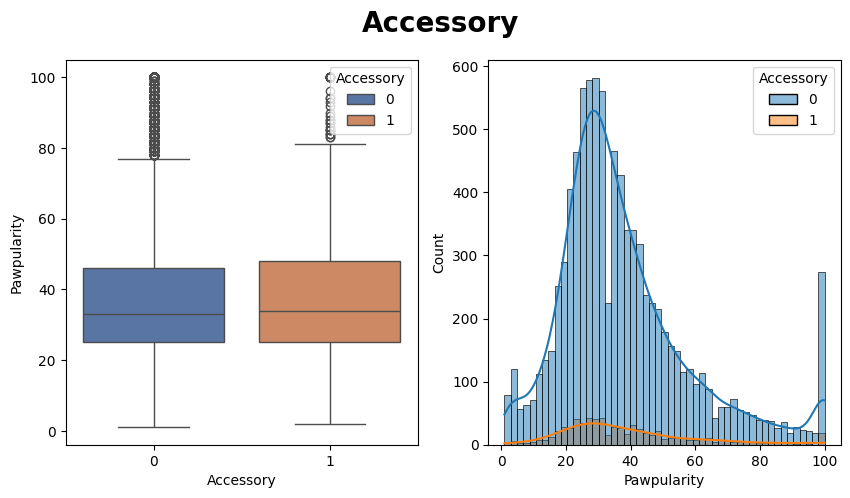

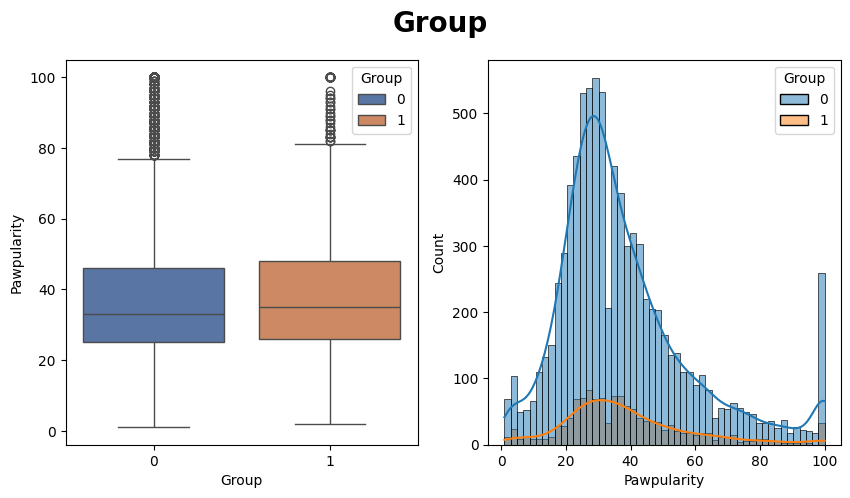

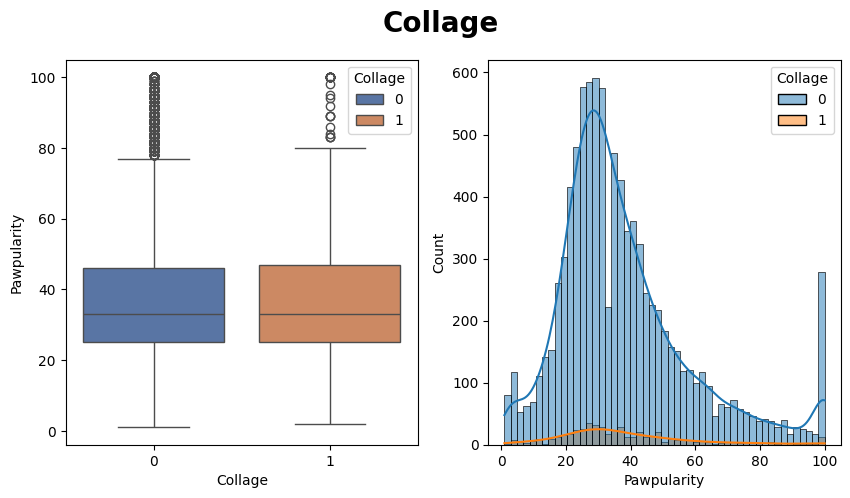

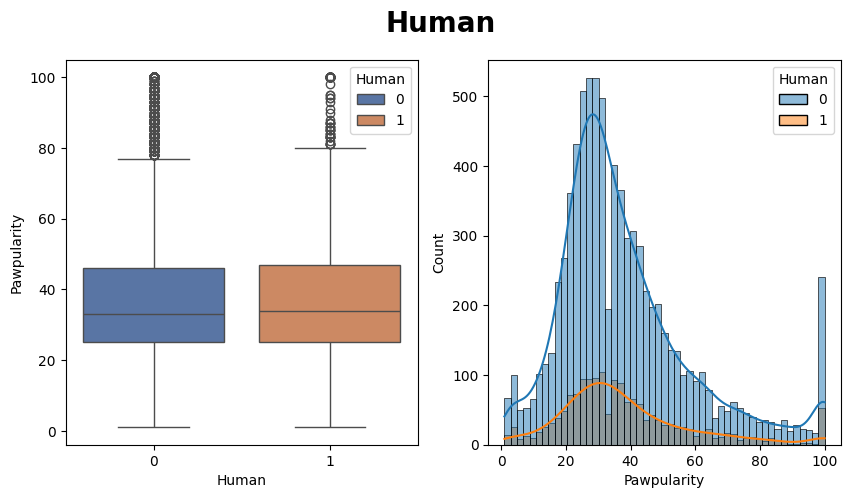

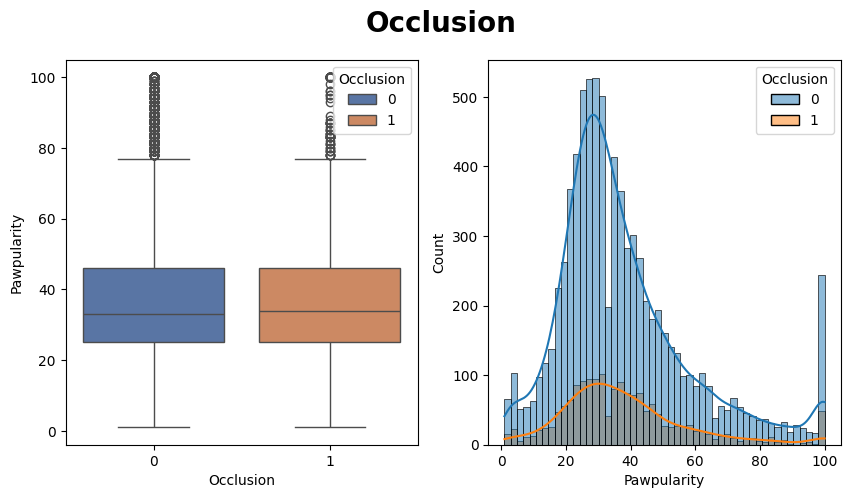

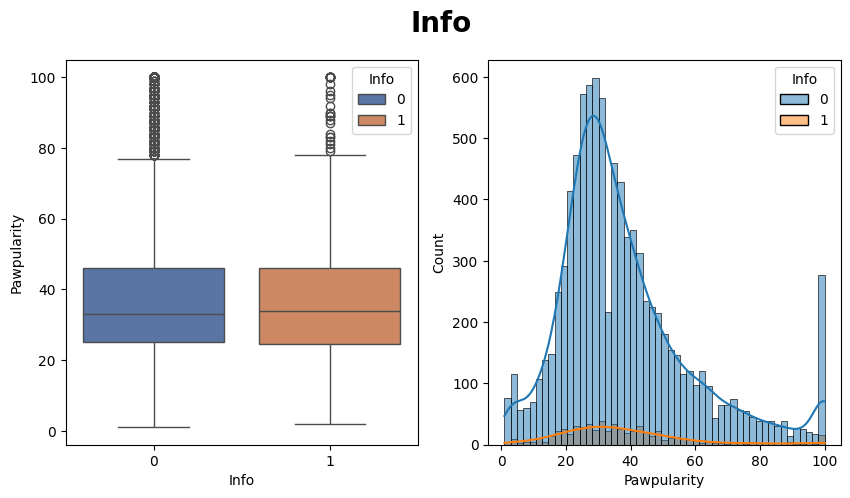

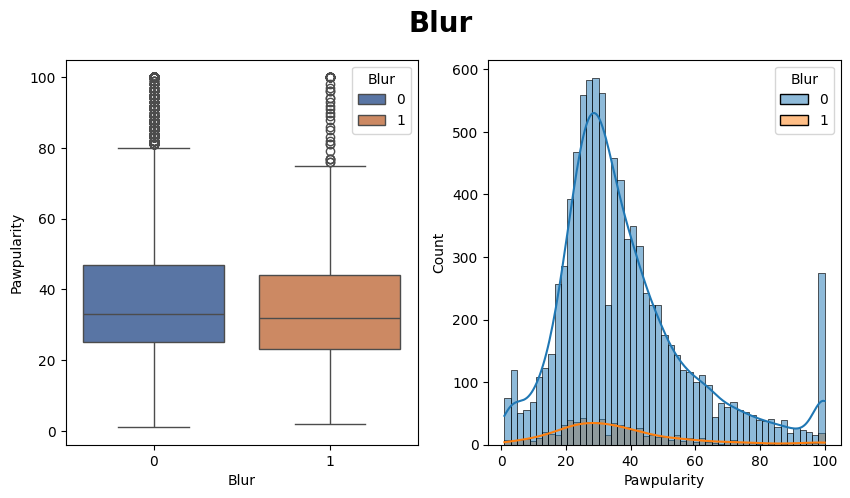

In [11]:
# Let's all features
feature_variables = train_df.columns.values.tolist()[1:-1] #to exclude id and Pawpularity
helpers.plotDistributionAcrossEachFeature(feature_variables,train_df)

> Looking at the above distribtions, we can see the usually the pets with less blur, no object or human inclusion, without frame and tools, near are labelled with high score, Now let's if there is any correlation between the feature and pawpularity

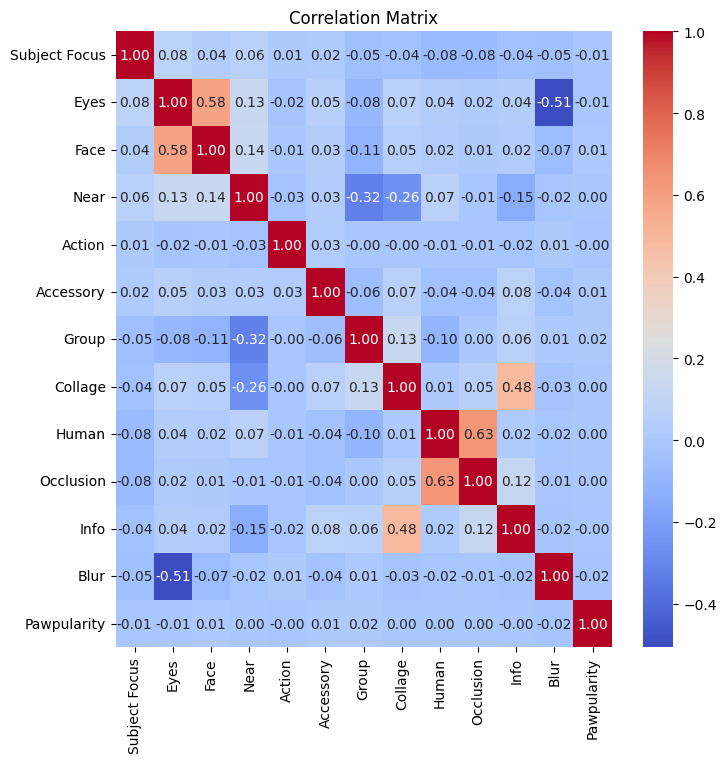

Subject Focus   -0.009853
Eyes            -0.006686
Face             0.008018
Near             0.001001
Action          -0.001373
Accessory        0.013287
Group            0.016469
Collage          0.001732
Human            0.003983
Occlusion        0.001979
Info            -0.004735
Blur            -0.023540
Name: Pawpularity, dtype: float64


In [12]:

helpers.plotCorrelationMatrix(train_df)


> Here we can see that there is not much significance correlation between the feature and pawpuarlity

### Now let's explore images

In [13]:
id_stem = Path(train_jpg[0]).stem
print('Original: ', train_jpg[0])
print('After: ', id_stem)


Original:  src/inputs/train\0007de18844b0dbbb5e1f607da0606e0.jpg
After:  0007de18844b0dbbb5e1f607da0606e0


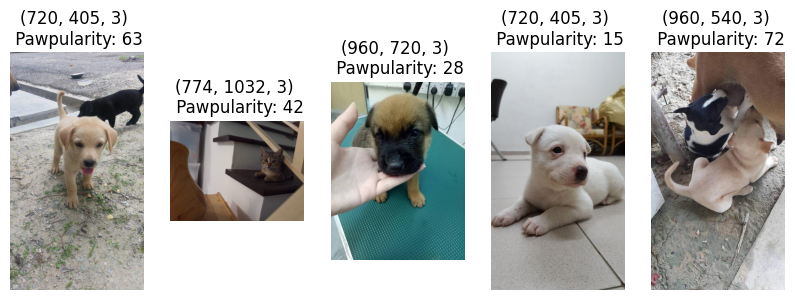

In [14]:
#let's see first 5 images
helpers.showPicture(5, train_jpg, train_df)

In [15]:
#Let's see the lowest and highest score images
print(train_df["Pawpularity"].max())
print(train_df["Pawpularity"].min())


100
1


In [16]:
train_df_max_id =  train_df.loc[train_df["Pawpularity"] == train_df["Pawpularity"].max(),"Id"].iloc[0]
train_df_min_id =  train_df.loc[train_df["Pawpularity"] == train_df["Pawpularity"].min(),"Id"].iloc[0]

In [17]:
filtered_jpg = [p for p in train_jpg if Path(p).stem in [train_df_max_id,train_df_min_id]]

##### let's check the high Pawpularity and low Pawpularity images

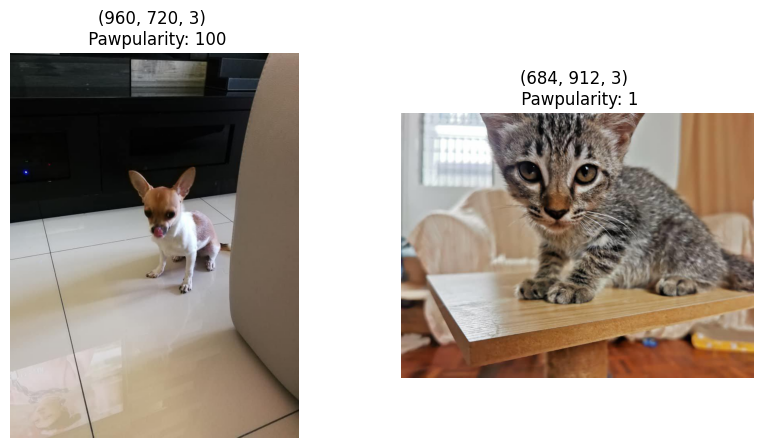

In [18]:
helpers.showPicture(2, filtered_jpg, train_df)

### 2.  Models

In [19]:
from fastai.vision.all import *


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [20]:
set_seed(999, reproducible=True)


In [21]:
train_df['path'] = train_df['Id'].map(lambda x:str(BASE_PATH+'train/'+x)+'.jpg')
train_df = train_df.drop(columns=['Id'])
train_df = train_df.sample(frac=1).reset_index(drop=True) #shuffle dataframe
train_df.head()

Subject Focus  Eyes  Face  Near  Action  Accessory  Group  Collage  Human  \
0              0     0     1     1       0          0      0        0      0   
1              0     1     1     1       0          1      0        1      0   
2              0     0     1     1       0          1      0        0      0   
3              0     1     1     1       0          0      0        0      1   
4              0     1     1     1       0          0      0        1      0   

   Occlusion  Info  Blur  Pawpularity  \
0          0     0     1           50   
1          0     1     0           25   
2          0     0     0           27   
3          1     0     0           19   
4          0     0     0           27   

                                                    path  
0  src/inputs/train/ebaaa8e384b3d2f0a56c7ff7675c154c.jpg  
1  src/inputs/train/25e3bf4267c2dc3f579b779418221bb7.jpg  
2  src/inputs/train/6548166fb3fda22b67881176397f0223.jpg  
3  src/inputs/train/472c40116e1833555715e4774445ae5b.jpg  
4  src/inputs/train/7b77e1a6d93667b575d57db83facd860.jpg

In [22]:
train_df['norm_score'] = train_df['Pawpularity']/100
train_df['norm_score']

0       0.50
1       0.25
2       0.27
3       0.19
4       0.27
        ... 
9907    0.26
9908    0.65
9909    0.38
9910    0.44
9911    0.62
Name: norm_score, Length: 9912, dtype: float64

In [23]:
train_df.head()

Subject Focus  Eyes  Face  Near  Action  Accessory  Group  Collage  Human  \
0              0     0     1     1       0          0      0        0      0   
1              0     1     1     1       0          1      0        1      0   
2              0     0     1     1       0          1      0        0      0   
3              0     1     1     1       0          0      0        0      1   
4              0     1     1     1       0          0      0        1      0   

   Occlusion  Info  Blur  Pawpularity  \
0          0     0     1           50   
1          0     1     0           25   
2          0     0     0           27   
3          1     0     0           19   
4          0     0     0           27   

                                                    path  norm_score  
0  src/inputs/train/ebaaa8e384b3d2f0a56c7ff7675c154c.jpg        0.50  
1  src/inputs/train/25e3bf4267c2dc3f579b779418221bb7.jpg        0.25  
2  src/inputs/train/6548166fb3fda22b67881176397f0223.jpg        0.27  
3  src/inputs/train/472c40116e1833555715e4774445ae5b.jpg        0.19  
4  src/inputs/train/7b77e1a6d93667b575d57db83facd860.jpg        0.27

In [24]:
im = Image.open(train_df['path'][1])
width, height = im.size
print(width,height)


960 960


In [25]:
dls = ImageDataLoaders.from_df(train_df, #pass in train DataFrame
                               valid_pct=0.2, #80-20 train-validation random split
                               seed=999, #seed
                               fn_col='path', #filename/path is in the second column of the DataFrame
                               label_col='norm_score', #label is in the first column of the DataFrame
                               y_block=RegressionBlock, #The type of target
                               bs=32, #pass in batch size
                               num_workers=8,
                               item_tfms=Resize(224), #pass in item_tfms
                               batch_tfms=setup_aug_tfms([Brightness(), Contrast(), Hue(), Saturation()])) #pass in batch_tfms

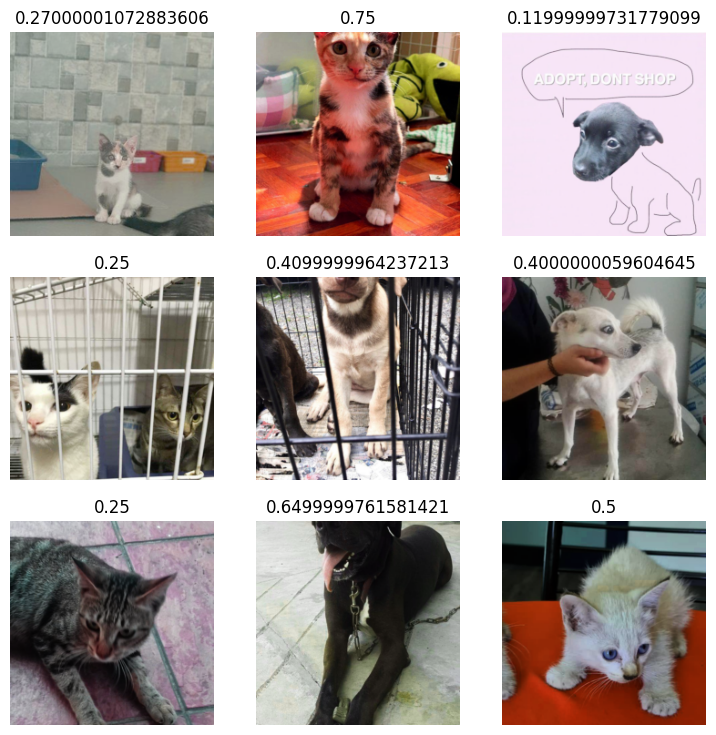

In [26]:
dls.show_batch()

In [27]:
from timm import create_model

model = create_model('swin_large_patch4_window7_224', pretrained=True, num_classes=dls.c)


In [28]:
def petfinder_rmse(input,target):
    return 100*torch.sqrt(F.mse_loss(F.sigmoid(input.flatten()), target))

In [29]:
learn = Learner(dls, model, loss_func=BCEWithLogitsLossFlat(), metrics=AccumMetric(petfinder_rmse)).to_fp16()

In [30]:
learn.lr_find(end_lr=3e-2)


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\fastai\callback\fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\fastai\callback\fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


KeyboardInterrupt: 

In [ ]:
learn.fit_one_cycle(10, 2e-5, cbs=[SaveModelCallback(), EarlyStoppingCallback(monitor='petfinder_rmse', comp=np.less, patience=3)])

Better model found at epoch 0 with valid_loss value: 0.6518074870109558.
Better model found at epoch 1 with valid_loss value: 0.6423997282981873.


KeyboardInterrupt: 

<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

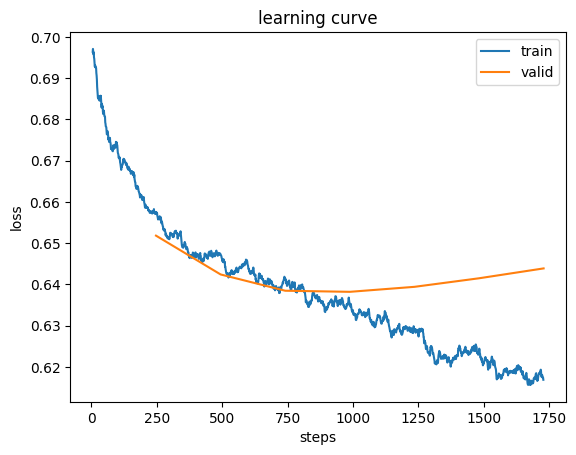

In [ ]:
learn.recorder.plot_loss()

In [ ]:
learn = learn.to_fp32()

In [ ]:
learn.save('fine-tuned')

Path('models/fine-tuned.pth')

In [ ]:
learn.export()


In [ ]:
test_df = pd.read_csv(BASE_PATH+'test.csv')
test_df.head()

Id  Subject Focus  Eyes  Face  Near  Action  \
0  4128bae22183829d2b5fea10effdb0c3              1     0     1     0       0   
1  43a2262d7738e3d420d453815151079e              0     1     0     0       0   
2  4e429cead1848a298432a0acad014c9d              0     0     0     1       0   
3  80bc3ccafcc51b66303c2c263aa38486              1     0     1     0       0   
4  8f49844c382931444e68dffbe20228f4              1     1     1     0       1   

   Accessory  Group  Collage  Human  Occlusion  Info  Blur  
0          1      1        0      0          1     0     1  
1          0      1        1      0          0     0     0  
2          1      1        1      0          1     1     1  
3          0      0        0      0          0     1     0  
4          1      0        1      0          1     1     0

In [ ]:
test_df['Pawpularity'] = [1]*len(test_df)
test_df['path'] = test_df['Id'].map(lambda x:str(BASE_PATH+'test/'+x)+'.jpg')
test_df = test_df.drop(columns=['Id'])
train_df['norm_score'] = train_df['Pawpularity']/100
test_dl = dls.test_dl(test_df)

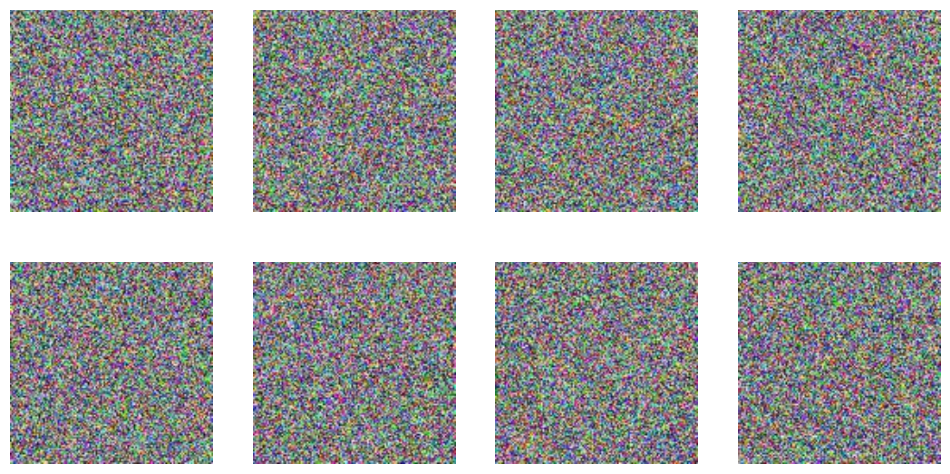

In [ ]:
test_dl.show_batch()


In [ ]:
preds, _ = learn.tta(dl=test_dl, n=5, beta=0)


In [ ]:
preds

tensor([[0.4473],
        [0.4413],
        [0.4381],
        [0.4422],
        [0.4495],
        [0.4289],
        [0.4339],
        [0.4432]])

# Model 2

In [31]:
from collections import defaultdict
import pandas as pd
import numpy as np
import os
import random
import gc
import cv2
import glob
gc.enable()
pd.set_option('display.max_columns', None)

# Visialisation
import matplotlib.pyplot as plt
%matplotlib inline

# Image Aug
import albumentations
from albumentations.pytorch.transforms import ToTensorV2

# Deep Learning
from torch.utils.data import Dataset, DataLoader
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts, OneCycleLR, CosineAnnealingLR
import torch
import torchvision
import timm
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
#Metrics
from sklearn.metrics import mean_squared_error

# Random Seed Initialize
RANDOM_SEED = 42

def seed_everything(seed=RANDOM_SEED):
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True
    
seed_everything()

In [ ]:
Config = {
    'seed' : 2021,  # setting the seed
    'debug': False,  # debug mode
    'num_folds': 5, # number of folds to split
    'trn_folds': [0, ],  # folds to train
    'batch_size': 12,  # batch size
    'num_workers' : 8,  # number of cpu workers
    'img_size': 512,  # image size
    'model': 'efficientnet_b3',  # model to use
    'img_ftr_len': 500, # length of vector to encode the images in
    'epochs': 15,        # numbers of epochs
    'precision': 16,
    'weight_decay': 1e-6,
    
    # learning
    'lr': 1e-4,
    'T_max': 10,
    'min_lr': 1e-6,
    'patience_earlystop': 3,
}   

In [56]:
from sklearn import model_selection

def create_folds(data, num_splits, seed):
    data["kfold"] = -1
    num_bins = int(np.floor(1 + np.log2(len(data))))

    data.loc[:, "bins"] = pd.cut(data["Pawpularity"], bins=num_bins, labels=False)

    kf = model_selection.StratifiedKFold(n_splits=num_splits, shuffle=True, random_state=seed)
    
    for f, (t_, v_) in enumerate(kf.split(X=data, y=data.bins.values)):
        data.loc[v_, 'kfold'] = f
    
    data = data.drop("bins", axis=1)

    return data

train_df = create_folds(train_df, Config['num_folds'], Config['seed'])

In [57]:
target = ['Pawpularity']
not_features = ['Id', 'kfold', 'path', 'Pawpularity']
cols = list(train_df.columns)
features = [feat for feat in cols if feat not in not_features]
print(features)

['Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur', 'norm_score']


In [58]:
TRAIN_FOLDS = [0, 1, 2, 3, 4]


In [59]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
    
print(f'Using device: {device}')

Using device: cuda


In [60]:
params = {
    'model': 'vit_large_patch32_384',
    'dense_features': features,
    'pretrained': True,
    'inp_channels': 3,
    'im_size': 384,
    'device': device,
    'lr': 1e-5,
    'weight_decay': 1e-6,
    'batch_size': 32,
    'num_workers' : 0,
    'epochs': 10,
    'out_features': 1,
    'dropout': 0.2,
    'num_fold': len(TRAIN_FOLDS),
    'mixup': False,
    'mixup_alpha': 1.0,
    'scheduler_name': 'CosineAnnealingWarmRestarts',
    'T_0': 5,
    'T_max': 5,
    'T_mult': 1,
    'min_lr': 1e-7,
    'max_lr': 1e-4
}

1. Train Augmentation

In [61]:
def get_train_transforms(DIM = params['im_size']):
    return albumentations.Compose(
        [
            albumentations.Resize(DIM,DIM),
            albumentations.Normalize(
                mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225],
            ),
            albumentations.HorizontalFlip(p=0.5),
            albumentations.VerticalFlip(p=0.5),
            albumentations.Rotate(limit=180, p=0.7),
            albumentations.ShiftScaleRotate(
                shift_limit = 0.1, scale_limit=0.1, rotate_limit=45, p=0.5
            ),
            albumentations.HueSaturationValue(
                hue_shift_limit=0.2, sat_shift_limit=0.2,
                val_shift_limit=0.2, p=0.5
            ),
            albumentations.RandomBrightnessContrast(
                brightness_limit=(-0.1, 0.1),
                contrast_limit=(-0.1, 0.1), p=0.5
            ),
            ToTensorV2(p=1.0),
        ]
    )

2. Mix up

In [62]:
def mixup_data(x, z, y, params):
    if params['mixup_alpha'] > 0:
        lam = np.random.beta(
            params['mixup_alpha'], params['mixup_alpha']
        )
    else:
        lam = 1

    batch_size = x.size()[0]
    if params['device'].type == 'cuda':
        index = torch.randperm(batch_size).cuda()
    else:
        index = torch.randperm(batch_size)

    mixed_x = lam * x + (1 - lam) * x[index, :]
    mixed_z = lam * z + (1 - lam) * z[index, :]
    y_a, y_b = y, y[index]
    return mixed_x, mixed_z, y_a, y_b, lam

def mixup_criterion(criterion, pred, y_a, y_b, lam):
    return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)

3. Valid Augmentation

In [63]:
def get_valid_transforms(DIM = params['im_size']):
    return albumentations.Compose(
        [
          albumentations.Resize(DIM,DIM),
          albumentations.Normalize(
              mean=[0.485, 0.456, 0.406],
              std=[0.229, 0.224, 0.225],
          ),
          ToTensorV2(p=1.0)
        ]
    )

In [64]:
class CuteDataset(Dataset):
    def __init__(self, images_filepaths, dense_features, targets, transform=None):
        self.images_filepaths = images_filepaths
        self.dense_features = dense_features.astype(np.float32)
        self.targets = targets.astype(np.float32)
        self.transform = transform

    def __len__(self):
        return len(self.images_filepaths)

    def __getitem__(self, idx):
        image_filepath = self.images_filepaths[idx]
        image = cv2.imread(image_filepath)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        if self.transform is not None:
            image = self.transform(image=image)['image']
        
        dense = self.dense_features[idx, :]
        label = torch.tensor(self.targets[idx]).float()
        return image, dense, label

In [65]:
X_train = train_df['path']
X_train_dense = train_df[params['dense_features']]
y_train = train_df['Pawpularity']
train_dataset = CuteDataset(
    images_filepaths=X_train.values,
    dense_features=X_train_dense.values,
    targets=y_train.values,
    transform=get_train_transforms()
)

In [66]:
def show_image(train_dataset=train_dataset, inline=4):
    plt.figure(figsize=(20,10))
    for i in range(inline):
        rand = random.randint(0, len(train_dataset))
        image, dense, label = train_dataset[rand]
        plt.subplot(1, inline, i%inline +1)
        plt.axis('off')
        plt.imshow(image.permute(2, 1, 0))
        plt.title(f'Pawpularity: {label}')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1178203..2.5862827].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1080873..2.6399999].


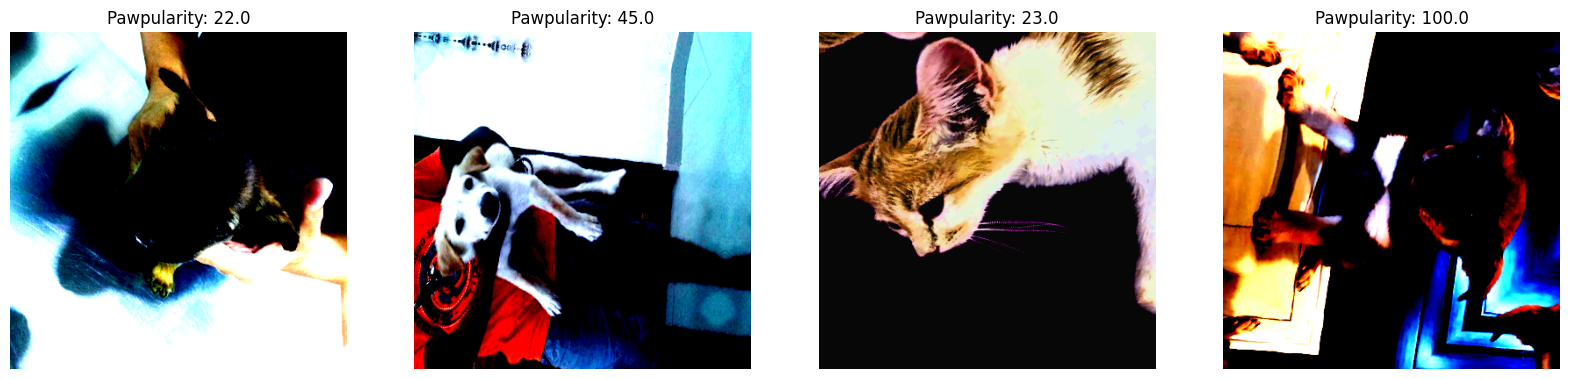

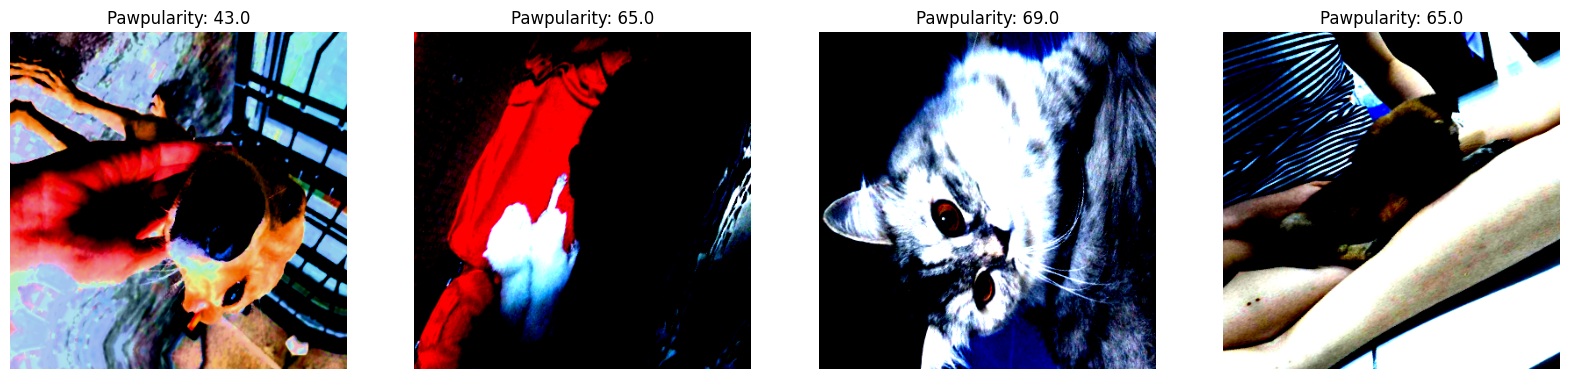

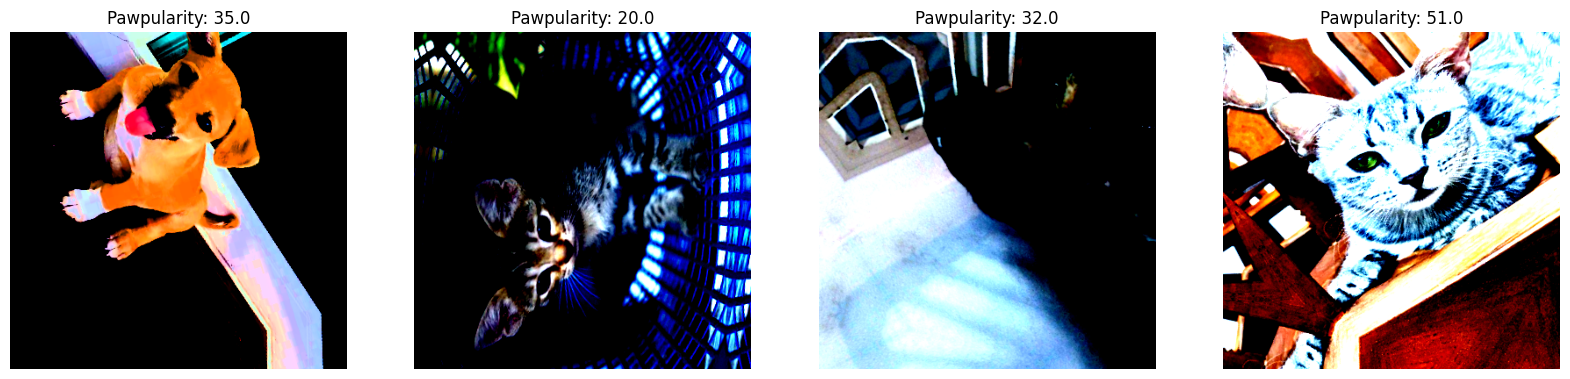

In [67]:
for i in range(3):
    show_image(inline=4)

In [68]:
del X_train, X_train_dense, y_train, train_dataset


In [69]:
# # def usr_rmse_score(output, target):
# #     y_pred = torch.sigmoid(output).cpu()
# #     y_pred = y_pred.detach().numpy()*100
# #     target = target.cpu()*100
    
# #     return mean_squared_error(target, y_pred, squared=False)

# def usr_rmse_score(output, target):
#     y_pred = torch.sigmoid(output).cpu()
#     y_pred = y_pred.detach().numpy()*100
#     target = target.cpu()*100
#     return mean_squared_error(target, y_pred, squared=False)
def usr_rmse_score(output, target):
    with torch.no_grad():
        y_pred = torch.sigmoid(output) * 100
        target_scaled = target * 100
        rmse = torch.sqrt(torch.mean((y_pred - target_scaled) ** 2))
    return rmse.item()


In [70]:
class MetricMonitor:
    def __init__(self, float_precision=3):
        self.float_precision = float_precision
        self.reset()

    def reset(self):
        self.metrics = defaultdict(lambda: {"val": 0, "count": 0, "avg": 0})

    def update(self, metric_name, val):
        metric = self.metrics[metric_name]

        metric["val"] += val
        metric["count"] += 1
        metric["avg"] = metric["val"] / metric["count"]

    def __str__(self):
        return " | ".join(
            [
                "{metric_name}: {avg:.{float_precision}f}".format(
                    metric_name=metric_name, avg=metric["avg"],
                    float_precision=self.float_precision
                )
                for (metric_name, metric) in self.metrics.items()
            ]
        )


Scheduler

In [71]:
def get_scheduler(optimizer, scheduler_params=params):
    if scheduler_params['scheduler_name'] == 'CosineAnnealingWarmRestarts':
        scheduler = CosineAnnealingWarmRestarts(
            optimizer,
            T_0=scheduler_params['T_0'],
            eta_min=scheduler_params['min_lr'],
            last_epoch=-1
        )
    elif scheduler_params['scheduler_name'] == 'OneCycleLR':
        scheduler = OneCycleLR(
            optimizer,
            max_lr=scheduler_params['max_lr'],
            steps_per_epoch=int(((scheduler_params['num_fold']-1) * train_df.shape[0]) / (scheduler_params['num_fold'] * scheduler_params['batch_size'])) + 1,
            epochs=scheduler_params['epochs'],
        )

    elif scheduler_params['scheduler_name'] == 'CosineAnnealingLR':
        scheduler = CosineAnnealingLR(
            optimizer,
            T_max=scheduler_params['T_max'],
            eta_min=scheduler_params['min_lr'],
            last_epoch=-1
        )
    return scheduler

CNN

In [72]:
class PetNet(nn.Module):
    def __init__(self, model_name=params['model'], out_features=params['out_features'], inp_channels=params['inp_channels'],
                 pretrained=params['pretrained'], num_dense=len(params['dense_features'])):
        super().__init__()
        self.model = timm.create_model(model_name, pretrained=pretrained, in_chans=inp_channels)
        n_features = self.model.head.in_features
        self.model.head = nn.Linear(n_features, 128)
        self.fc = nn.Sequential(
            nn.Linear(128 + num_dense, 64),
            nn.ReLU(),
            nn.Linear(64, out_features)
        )
        self.dropout = nn.Dropout(params['dropout'])
    
    def forward(self, image, dense):
        embeddings = self.model(image)
        x = self.dropout(embeddings)
        x = torch.cat([x, dense], dim=1)
        output = self.fc(x)
        return output


In [80]:
from tqdm import tqdm
from sklearn.metrics import root_mean_squared_error



Train and Validation

In [81]:
def train_fn(train_loader, model, criterion, optimizer, epoch, params, scheduler=None):
    metric_monitor = MetricMonitor()
    model.train()
    stream = tqdm(train_loader)

    all_train_preds = []
    all_train_targets = []

    for i, (images, dense, target) in enumerate(stream, start=1):
        if params['mixup']:
            images, dense, target_a, target_b, lam = mixup_data(images, dense, target.view(-1, 1), params)
            images = images.to(params['device'], dtype=torch.float)
            dense = dense.to(params['device'], dtype=torch.float)
            target_a = target_a.to(params['device'], dtype=torch.float)
            target_b = target_b.to(params['device'], dtype=torch.float)
        else:
            images = images.to(params['device'], non_blocking=True)
            dense = dense.to(params['device'], non_blocking=True)
            target = target.to(params['device'], non_blocking=True).float().view(-1, 1)

        output = model(images, dense)

        if params['mixup']:
            loss = mixup_criterion(criterion, output, target_a, target_b, lam)
        else:
            loss = criterion(output, target)

        # collect predictions and targets for epoch-level RMSE
        if params['mixup']:
            # only original targets make sense for evaluation
            all_train_preds.extend(torch.sigmoid(output).detach().cpu().numpy().flatten() * 100)
            all_train_targets.extend(target.detach().cpu().numpy().flatten() * 100)
        else:
            all_train_preds.extend(torch.sigmoid(output).detach().cpu().numpy().flatten() * 100)
            all_train_targets.extend(target.detach().cpu().numpy().flatten() * 100)

        metric_monitor.update('Loss', loss.item())
        loss.backward()
        optimizer.step()

        if scheduler is not None:
            scheduler.step()

        optimizer.zero_grad()
        stream.set_description(f"Epoch: {epoch:02}. Train. {metric_monitor}")

    # compute epoch-level RMSE
    epoch_rmse = root_mean_squared_error(all_train_targets, all_train_preds)
    print(f"Epoch {epoch:02} Train RMSE: {epoch_rmse:.3f}")
    return epoch_rmse


validate

In [82]:
def validate_fn(val_loader, model, criterion, epoch, params):
    metric_monitor = MetricMonitor()
    model.eval()
    stream = tqdm(val_loader)
    final_targets = []
    final_outputs = []

    with torch.no_grad():
        for i, (images, dense, target) in enumerate(stream, start=1):
            images = images.to(params['device'], non_blocking=True)
            dense = dense.to(params['device'], non_blocking=True)
            target = target.to(params['device'], non_blocking=True).float().view(-1, 1)
            output = model(images, dense)
            loss = criterion(output, target)

            metric_monitor.update('Loss', loss.item())
            stream.set_description(f"Epoch: {epoch:02}. Valid. {metric_monitor}")

            targets = (target.detach().cpu().numpy() * 100).tolist()
            outputs = (torch.sigmoid(output).detach().cpu().numpy() * 100).tolist()

            final_targets.extend(targets)
            final_outputs.extend(outputs)

    # compute epoch-level RMSE
    epoch_rmse = root_mean_squared_error(final_targets, final_outputs)
    print(f"Epoch {epoch:02} Valid RMSE: {epoch_rmse:.3f}")
    return final_outputs, final_targets, epoch_rmse


In [76]:
best_models_of_each_fold = []
rmse_tracker = []

In [54]:
from sklearn.metrics import root_mean_squared_error


In [ ]:
for fold in TRAIN_FOLDS:
    print(''.join(['#'] * 50))
    print(f"{''.join(['='] * 15)} TRAINING FOLD: {fold+1}/{train_df['kfold'].nunique()} {''.join(['='] * 15)}")

    # Data Split to train and Validation
    train = train_df[train_df['kfold'] != fold]
    valid = train_df[train_df['kfold'] == fold]

    X_train = train['path']
    X_train_dense = train[params['dense_features']]
    y_train = train['Pawpularity'] / 100
    X_valid = valid['path']
    X_valid_dense = valid[params['dense_features']]
    y_valid = valid['Pawpularity'] / 100

    # Pytorch Dataset Creation
    train_dataset = CuteDataset(
        images_filepaths=X_train.values,
        dense_features=X_train_dense.values,
        targets=y_train.values,
        transform=get_train_transforms()
    )

    valid_dataset = CuteDataset(
        images_filepaths=X_valid.values,
        dense_features=X_valid_dense.values,
        targets=y_valid.values,
        transform=get_valid_transforms()
    )

    # Pytorch Dataloader creation
    train_loader = DataLoader(
        train_dataset, batch_size=params['batch_size'], shuffle=True,
        num_workers=params['num_workers'], pin_memory=True
    )

    val_loader = DataLoader(
        valid_dataset, batch_size=params['batch_size'], shuffle=False,
        num_workers=params['num_workers'], pin_memory=True
    )

    # Model, cost function and optimizer instancing
    model = PetNet()
    model = model.to(params['device'])
    criterion = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.AdamW(model.parameters(), lr=params['lr'],
                                  weight_decay=params['weight_decay'],
                                  amsgrad=False)
    scheduler = get_scheduler(optimizer)

    # Training and Validation Loop
    best_rmse = np.inf
    best_epoch = np.inf
    best_model_name = None

    # for epoch in range(1, params['epochs'] + 1):
    for epoch in range(1, 2):
        train_rmse = train_fn(train_loader, model, criterion, optimizer, epoch, params, scheduler)
        predictions, valid_targets, val_rmse = validate_fn(val_loader, model, criterion, epoch, params)

        if val_rmse < best_rmse:
            best_rmse = val_rmse
            best_epoch = epoch
            if best_model_name is not None:
                os.remove(best_model_name)
            torch.save(model.state_dict(),
                       f"{params['model']}_{epoch}_epoch_f{fold+1}_{val_rmse}_rmse.pth")
            best_model_name = f"{params['model']}_{epoch}_epoch_f{fold+1}_{val_rmse}_rmse.pth"

    # Print summary of this fold
    print('')
    print(f'The best RMSE: {best_rmse} for fold {fold+1} was achieved on epoch: {best_epoch}.')
    print(f'The Best saved model is: {best_model_name}')
    best_models_of_each_fold.append(best_model_name)
    rmse_tracker.append(best_rmse)
    print(''.join(['#'] * 50))
    del model
    gc.collect()
    torch.cuda.empty_cache()

print('')
print(f'Average RMSE of all folds: {round(np.mean(rmse_tracker), 4)}')

##################################################
=============== TRAINING FOLD: 1/5 ===============


Epoch: 01. Train. Loss: 0.664: 100%|██████████| 248/248 [44:01<00:00, 10.65s/it]


Epoch 01 Train RMSE: 20.624


Epoch: 01. Valid. Loss: 0.656: 100%|██████████| 62/62 [05:33<00:00,  5.38s/it]


Epoch 01 Valid RMSE: 19.595

The best RMSE: 19.5953022528151 for fold 1 was achieved on epoch: 1.
The Best saved model is: vit_large_patch32_384_1_epoch_f1_19.5953022528151_rmse.pth
##################################################
##################################################
=============== TRAINING FOLD: 2/5 ===============


Epoch: 01. Train. Loss: 0.664:  35%|███▌      | 88/248 [13:11<23:59,  9.00s/it]


KeyboardInterrupt: 

In [ ]:
for i, name in enumerate(best_models_of_each_fold):
    print(f'Best model of fold {i+1}: {name}')

# model 3

In [ ]:
import numpy as np
import pandas as pd
import os
import path
import random
import cv2
import timm
import gc
import albumentations
from tqdm import tqdm
from collections import defaultdict

import matplotlib.pyplot as plt
%matplotlib inline

# Import PyTorch Libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts
# from pytorchtools import EarlyStopping
from torch.utils.data import DataLoader


# Import SKlearn Libraries
from sklearn import datasets
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error


In [ ]:
#Early stopping

In [ ]:
data_df = pd.read_csv(BASE_PATH + "train.csv")
test_df = pd.read_csv(BASE_PATH + "test.csv")

In [ ]:
target = ['Pawpularity']
not_features = ['Id', 'kfold', 'image_path', 'Pawpularity']
cols = list(data_df.columns)
features = [feat for feat in cols if feat not in not_features]
print(features)

['Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur']


In [ ]:
params = {
    'folder_dir': '../input/petfinder-pawpularity-score/',
    'model':'swin_large_patch4_window12_384',
    'image_dir': '../input/petfinder-pawpularity-score/train/',
    'test_img_dir': '../input/petfinder-pawpularity-score/test/',
    'features': features,
    'img_size' : 384,
    'dropout':0.4,
    'num_workers':2,
    'fold' : 10,
    'batch_size' : 8,
    'lr' : 1e-5,
    'scheduler_name': 'CosineAnnealingWarmRestarts',
    'T_0':50,
    'min_lr':1e-7,
    'pretrained':True,
    'weight_decay':1e-6
}

# Setting manual seed to everything.
# So that we will get the same results everything we run the notebook.
SEED = 42

def seed_everything(seed=SEED):
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True
    
seed_everything()
2.2 

2.2

In [ ]:
class PawDataSet():
    def __init__(self,dataset, params, features, transform = None,):
        self.dataset = dataset
        self.image_path = dataset['Id'].apply(lambda x: os.path.join(params['image_dir'],f'{x}.jpg'))
        self.target_label = dataset['Pawpularity']
        self.features = dataset[features].values
        self.class_label = self.target_label/100
        self.transform = transform
        self.params = params
    
    # Returen the len of data.
    def __len__(self):
        return len(self.image_path)
    
    # Load images and target score according to index number (idx)
    def __getitem__(self, idx):
        image_filepath = self.image_path[idx]
        image = cv2.imread(image_filepath)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        if self.transform is not None:
            image = self.transform(image=image)['image']
        
        image = np.transpose(image,(2, 0, 1)).astype(np.float32)
        image = torch.tensor(image)
        features = self.features[idx, :]
        targets = torch.tensor(self.class_label[idx]).float()
        
        return image, features, targets

In [ ]:
# Augmentation function for the training data.
def Transform_train(DIM = params['img_size']):
    return albumentations.Compose(
        [
            albumentations.Resize(DIM,DIM),
            albumentations.Normalize(
                mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225],
            ),
            albumentations.HorizontalFlip(p=0.5),
            albumentations.VerticalFlip(p=0.5),
            albumentations.Rotate(limit=45, p=0.4),
            albumentations.ShiftScaleRotate(
                shift_limit = 0.1, scale_limit=0.1, rotate_limit=45, p=0.5
            ),
            albumentations.HueSaturationValue(
                hue_shift_limit=0.2, sat_shift_limit=0.2,
                val_shift_limit=0.2, p=0.5
            ),
            albumentations.RandomBrightnessContrast(
                brightness_limit=(-0.1, 0.1),
                contrast_limit=(-0.1, 0.1), p=0.5
            )
        ],
        p=1.0
    )

In [ ]:
# Augmentation function for the validation data.
def Transform_val(DIM = params['img_size']):
    return albumentations.Compose(
        [
            albumentations.Resize(DIM, DIM),
            albumentations.Normalize(
                mean = [0.485, 0.456, 0.406],
                std = [0.229, 0.224, 0.225],
                max_pixel_value=255.0,
                p = 1.0
            ),
        ],
        p=1.0
    )

In [ ]:
# Using Sturges' rule to determine the best number of bins for our data.
num_bins = int(np.floor(1+np.log2(len(data_df))))

In [ ]:
data_df['bins'] = pd.cut(data_df['Pawpularity'], bins=num_bins, labels=False)
data_df['fold'] = -1

# Function to create Folds.
def create_folds(data, num_splits):
    strat_kfold = StratifiedKFold(n_splits=num_splits, random_state=SEED, shuffle=True)
    for i, (_, idx) in enumerate(strat_kfold.split(data_df.index, data_df['bins'])):
        data_df.iloc[idx, -1] = i
    
    data_df['fold'] = data_df['fold'].astype('int')
    data_df.fold.value_counts().plot.bar(xlabel="Fold", ylabel="Number of data")
    

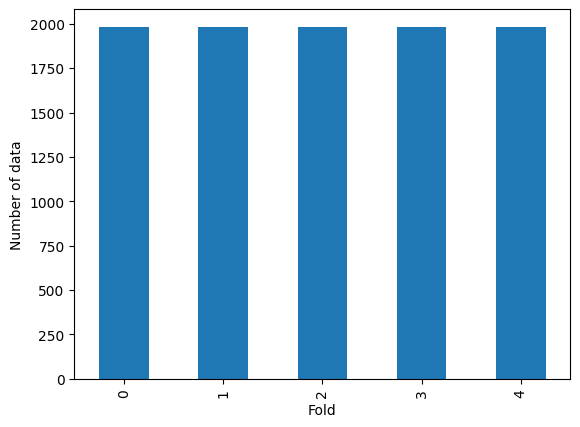

In [ ]:
# 5 Folds
df_5 = create_folds(data_df, num_splits=5)

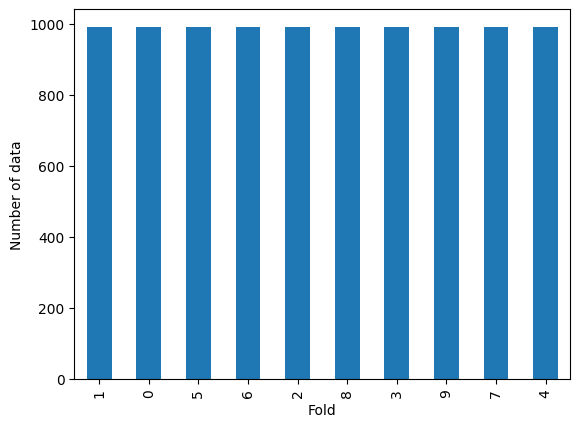

In [ ]:
# 10 Folds
df_10 = create_folds(data_df, num_splits=10)

In [ ]:
def usr_rmse_score(output, target):
    y_pred = torch.sigmoid(output).cpu()
    y_pred = y_pred.detach().numpy()*100
    target = target.cpu()*100
    
    return mean_squared_error(target, y_pred, squared=False)

In [ ]:
class MetricMonitor:
    def __init__(self, float_precision=3):
        self.float_precision = float_precision
        self.reset()
        
    def reset(self):
        self.metrics = defaultdict(lambda: {'val':0, 'count':0, 'avg':0})
    
    def update(self, metric_name, val):
        metric = self.metrics[metric_name]
        
        metric['val'] += val
        metric['count'] += 1
        metric['avg'] = metric['val'] / metric['count']
        
    def __str__(self):
        return "|".join(
            [
                "{metric_name}: {avg:.{float_precision}f}".format(
                    metric_name=metric_name, avg=metric['avg'],
                    float_precision=self.float_precision
                )
                for (metric_name, metric) in self.metrics.items()
            ]
        )

In [ ]:
def get_scheduler(optimizer, scheduler_params=params):
    if scheduler_params['scheduler_name'] == 'CosineAnnealingWarmRestarts':
        scheduler = CosineAnnealingWarmRestarts(
            optimizer,
            T_0 = scheduler_params['T_0'],
            eta_min = scheduler_params['min_lr'],
            last_epoch = -1
        )
    return scheduler

In [ ]:
# Load and print out the architecture of the pretrained model.
# We will change only the last layer of the model(head) in the next column.
SWIN_model = timm.create_model(model_name = params['model'])
print(SWIN_model)

SwinTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 192, kernel_size=(4, 4), stride=(4, 4))
    (norm): LayerNorm((192,), eps=1e-05, elementwise_affine=True)
  )
  (layers): Sequential(
    (0): SwinTransformerStage(
      (downsample): Identity()
      (blocks): Sequential(
        (0): SwinTransformerBlock(
          (norm1): LayerNorm((192,), eps=1e-05, elementwise_affine=True)
          (attn): WindowAttention(
            (qkv): Linear(in_features=192, out_features=576, bias=True)
            (attn_drop): Dropout(p=0.0, inplace=False)
            (proj): Linear(in_features=192, out_features=192, bias=True)
            (proj_drop): Dropout(p=0.0, inplace=False)
            (softmax): Softmax(dim=-1)
          )
          (drop_path1): Identity()
          (norm2): LayerNorm((192,), eps=1e-05, elementwise_affine=True)
          (mlp): Mlp(
            (fc1): Linear(in_features=192, out_features=768, bias=True)
            (act): GELU(approximate='none')
            (

In [ ]:
class PetNet(nn.Module):
    def __init__(self, model_name=params['model'], pretrained=params['pretrained'], features=len(params['features']) ):
        super().__init__()
        self.model = timm.create_model(model_name=model_name, pretrained=pretrained, in_chans=3)
        # Replace the final head layers in model with our own Linear layer
        num_features = self.model.head.in_features
        self.model.head = nn.Linear(num_features, 128)
        self.fully_connect = nn.Sequential(nn.Linear(128 + features, 64),
                                           nn.ReLU(),
                                           nn.Linear(64, 1)
                                          )
        self.dropout = nn.Dropout(p=0.5)
    
    def forward(self, image, features):
        x = self.model(image)
        # Using dropout functions to randomly shutdown some of the nodes in hidden layers to prevent overfitting.
        x = self.dropout(x)
        # Concatenate the metadata into the results.
        x = torch.cat([x, features], dim=1)
        output = self.fully_connect(x)
        return output

In [ ]:
def train_fn(train_loader, model, criterion, optimizer ,epoch, params, scheduler=None):
    metric_monitor = MetricMonitor()
    # Set the model into train model. There are train mode and eval mode.
    model.train()
    
    # Load the data using tqdm to visualize the training process.
    stream = tqdm(train_loader)
    
    for i, (images,features, target) in enumerate(stream):
        images = images.to(device)
        target = target.to(device).view(-1, 1)
        features = features.to(device)
        
        # Generate predictions by passing images through the model.
        preds = model(images, features)
        
        # Calculate the difference between prediction value and target value ('Pawpularity' label). 
        loss = criterion(preds, target)
        
        # Generate Root Mean Square Error score
        rmse_score = usr_rmse_score(preds, target)
        metric_monitor.update('Loss', loss.item())
        metric_monitor.update('RMSE', rmse_score)
        
        # Generate loss gradient and optimize the weight of model using optimizer.
        loss.backward()
        optimizer.step()
        
        # Use scheduler to change the learning rate.
        if scheduler is not None:
            scheduler.step()
            
        # Reset the gradient after each loop. To avoid it from adding up.
        optimizer.zero_grad()
        
        # Set description to the progress bar when we run this training function
        stream.set_description(f"Epoch: {epoch:02}. Train. {metric_monitor}")

In [ ]:
def validate_fn(val_loader, model, criterion, epoch, params):
    metric_monitor = MetricMonitor()
    
    # Set the model into evaluation mode. This will turn off the Dropout layers or BatchNorm layers in the model.
    model.eval()
    stream = tqdm(val_loader)
    valid_targets = []
    predictions = []
    
    # Turn off the gradient tracking for faster processing.
    with torch.no_grad():
        for i, (images,features, target) in enumerate(stream, start=1):
            images = images.to(device)
            target = target.float().view(-1, 1)
            target = target.to(device)
            features = features.to(device)
           
            preds = model(images, features)
            loss = criterion(preds, target)
           
            rmse_score = usr_rmse_score(preds, target)
            metric_monitor.update('Loss', loss.item())
            metric_monitor.update('RMSE', rmse_score)
            stream.set_description(f'Epoch: {epoch:02}. Valid. {metric_monitor}')
            
            targets = (target.detach().cpu().numpy()*100).tolist()
            outputs = (torch.sigmoid(preds).detach().cpu().numpy()*100).tolist()
            
            valid_targets.extend(targets)
            predictions.extend(outputs)
            
    return valid_targets, predictions

In [ ]:
best_models_of_each_fold = []
rmse_tracker = []

In [ ]:
import numpy as np
import torch

class EarlyStopping:
    """Early stops the training if validation score doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0):
        """
        Args:
            patience (int): How many epochs to wait after last time validation score improved.
            verbose (bool): If True, prints a message for each validation score improvement.
            delta (float): Minimum change in the monitored score to qualify as an improvement.
        """
        self.patience = patience
        self.verbose = verbose
        self.delta = delta
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_score_min = np.inf  # because we want to minimize RMSE

    def __call__(self, val_score, model):
        score = -val_score  # because lower RMSE is better

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_score, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                print(f"EarlyStopping counter: {self.counter} out of {self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_score, model)
            self.counter = 0

    def save_checkpoint(self, val_score, model):
        """Saves model when validation score improves."""
        if self.verbose:
            print(f"Validation score decreased ({self.val_score_min:.6f} --> {val_score:.6f}).  Saving model ...")
        self.val_score_min = val_score


In [ ]:
# Set the range from 0 to 10 to run the whole Folds.
for fold in range(1):
    # Split the data into training data and validation data for cross validation
    # The data that have same label as the fold will be used as Validation data, the rest as Training data.
    train = data_df[data_df['fold']!=fold].reset_index(drop=True)
    val = data_df[data_df['fold']==fold].reset_index(drop=True)
    
    # Making training and validating dataset.
    train_dataset = PawDataSet(
        dataset = train,
        params = params,
        features = params['features'],
        transform = Transform_train()
    )
    val_dataset = PawDataSet(
        dataset = val,
        params = params,
        features = params['features'],
        transform = Transform_val()
    )
    
    # Making data loader using PyTorch DataLoader function. This allow us to separate data into small batches to train the model.
    train_loader  = DataLoader(
        train_dataset, batch_size=params['batch_size'], shuffle=True, 
        num_workers=params['num_workers']
    )
    
    val_loader = DataLoader(
        val_dataset, batch_size=params['batch_size'], shuffle=False,
        num_workers=params['num_workers']
    )
    
    # Loading model into GPU.
    model = PetNet()
    model = model.to(device)
    
    # Setting criterion to calculate loss, optimizer and scheduler.
    criterion = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.AdamW(model.parameters(),
                                 lr=params['lr'],
                                 weight_decay=params['weight_decay'],
                                 amsgrad=False)
    
    # Use the scheduler functions that we defined at section 5.2 to update the learning rate in optimizer.
    scheduler = get_scheduler(optimizer)
    
    # Early stopping functions to stop the training process if the model is not improving after each epoch.
    early_stopping = EarlyStopping(patience=2, verbose=True)
    
    # Training and validation loop
    best_rmse = np.inf
    best_epoch = np.inf
    best_model_name = None
    
    # Epoch = how many times to repeat the training loop.
    for epoch in range(40):
        train_fn(train_loader, model, criterion, optimizer, epoch, params, scheduler)
        predictions, valid_targets = validate_fn(val_loader, model, criterion, epoch, params)
        rmse = round(mean_squared_error(valid_targets, predictions, squared=False), 3)
        
        # Condition loop to save the model with best score.
        if rmse < best_rmse:
            best_rmse = rmse
            best_epoch = epoch
            if best_model_name is not None:
                os.remove(best_model_name)
                
            # Saving state_dict of the best model to rerun it later for inference.
            torch.save(model.state_dict(),
                       f"{params['model']}_epoch_f{fold}.pth")
            best_model_name = f"{params['model']}_epoch_f{fold}.pth"
        
        # Evaluate the output rmse of the model to decide whether to stop the loop or not.
        early_stopping(rmse, model)
        
        # Stop the training loop if the score doesn't improve after each epoch.
        if early_stopping.early_stop:
            print("Early stopping")
            break
            
    # Print summary
    print('')
    print(f'The best RMSE: {best_rmse} for fold {fold+1} was achieved on epoch: {best_epoch}')
    print(f'The best saved model is: {best_model_name}')
    best_models_of_each_fold.append(best_model_name)
    rmse_tracker.append(best_rmse)
    print(''.join(['#']*50))
    del model
    gc.collect()
    torch.cuda.empty_cache()
    
print('')
print(f'Average RMSE of all folds: {round(np.mean(rmse_tracker), 4)}')
    

  0%|          | 0/1115 [00:00<?, ?it/s]

# model 4 SWIN with image+metadat

In [ ]:
import torchtext.vocab as vocab
import torch
import pandas as pd
from fastai.vision.all import *